# Analizando el modelo Sugarscape.
**A continuación se presenta un análisis de los datos arrojados por algunos experimentos realizados con el modelo de Sugarscape. Veremos la relación de la variable de dotación inicial (maximum-sugar-endowment y minimum-sugar-endowment) y las métricas del índice GINI, la cantidad de decesos por hambre (starvation) y la riqueza per cápita**
## Importando bibliotecas

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import re
sns.set()

# Métodos auxiliares

In [23]:
def limpiar_dataframe(df):
    limpiado = df.drop(columns='visualization')
    limpiado = limpiado.drop(limpiado[limpiado['[step]'] == 0].index) # aquellas runs que no se iniciaron
    limpiado = limpiado.drop(columns='[run number]')
    limpiado = limpiado.drop(columns='initial-population') #poblacion fija
    limpiado = limpiado.drop(columns='[step]') # en este punto, todas las runs son validas y llegaron a la it final
    try:
        limpiado = limpiado.drop(columns='taxation')
        limpiado = limpiado.drop(columns='redistribution')
    except:
        return limpiado
        
    return limpiado
    
def mapa_calor(df,medida,titulo,ruta):
    datos_aplanados = df.pivot(index="minimum-sugar-endowment", columns="maximum-sugar-endowment", values=medida)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(datos_aplanados, cmap='viridis',annot=False)
    plt.text(0, -0.5, titulo, fontsize=12, color='black', ha='left')
    plt.savefig(ruta,dpi=300, bbox_inches='tight')
    

# Mapas de calor sobre el índice GINI, decesos por hambruna, riqueza per cápita y cambios promedio de riqueza de los agentes

lineal-dirigida.csv
dinamica-uniforme.csv
lineal-dinamica.csv
uniforme-lineal.csv
lineal-uniforme.csv
dinamica-dinamica.csv


/tmp/ipykernel_14827/2367062642.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


lineal-lineal.csv
dinamica-lineal.csv
uniforme-uniforme.csv
uniforme-dinamica.csv


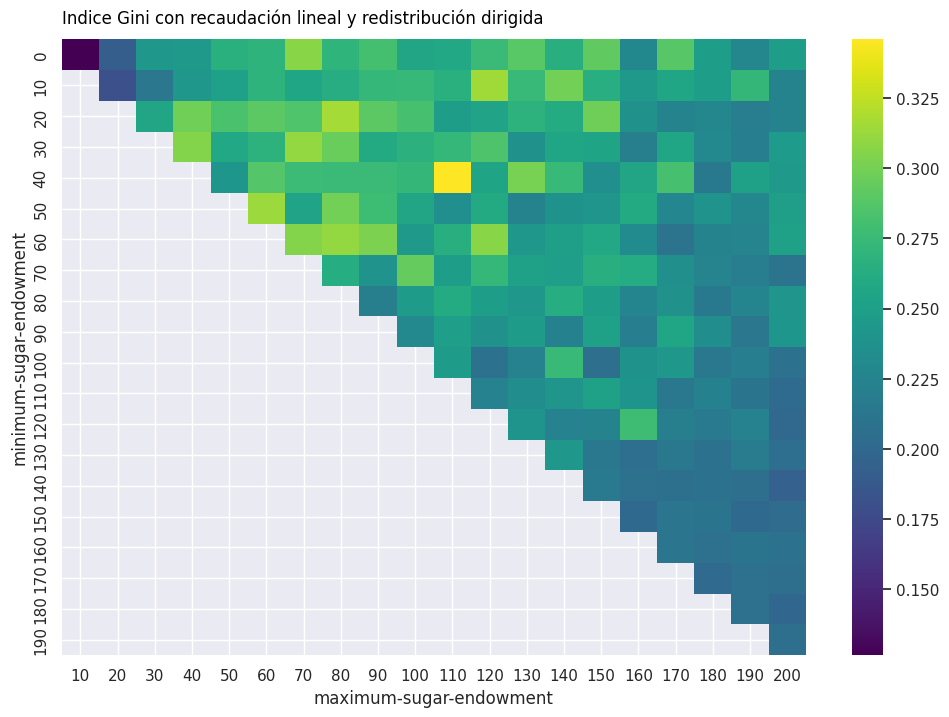

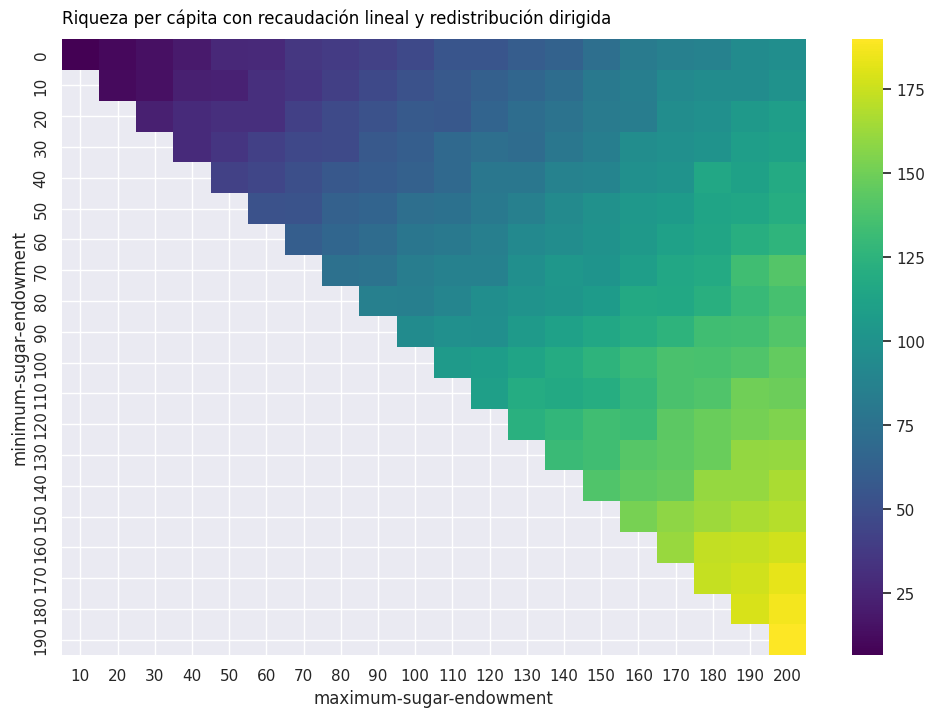

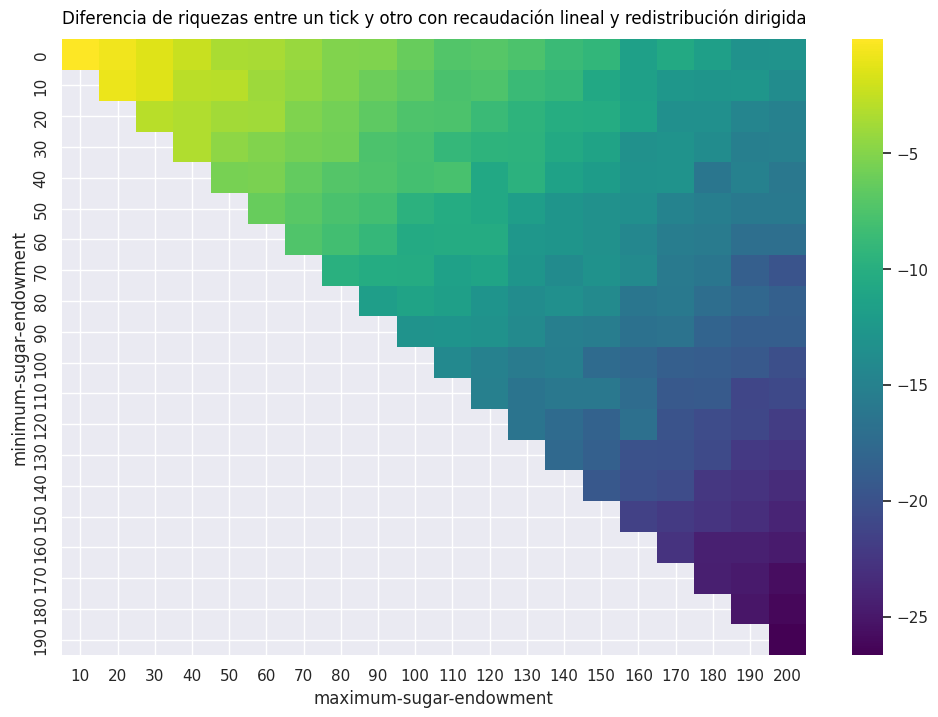

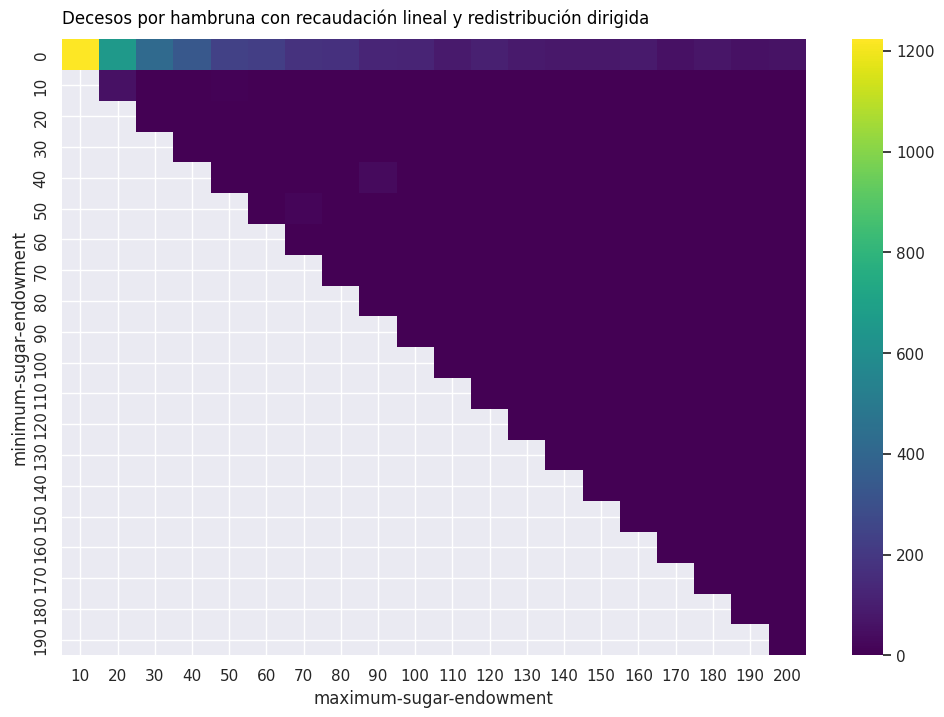

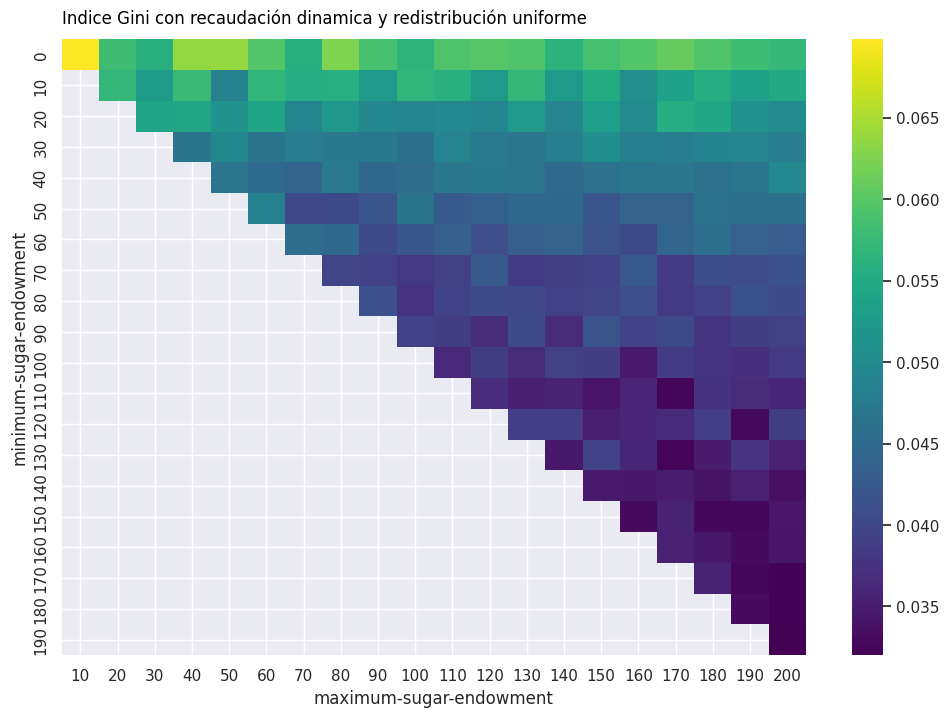

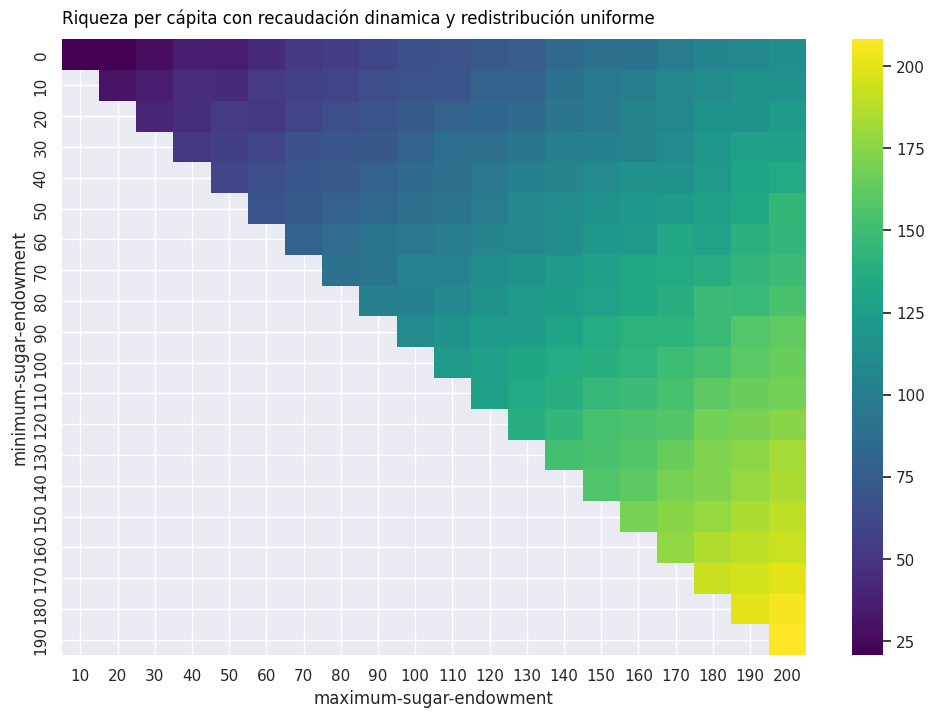

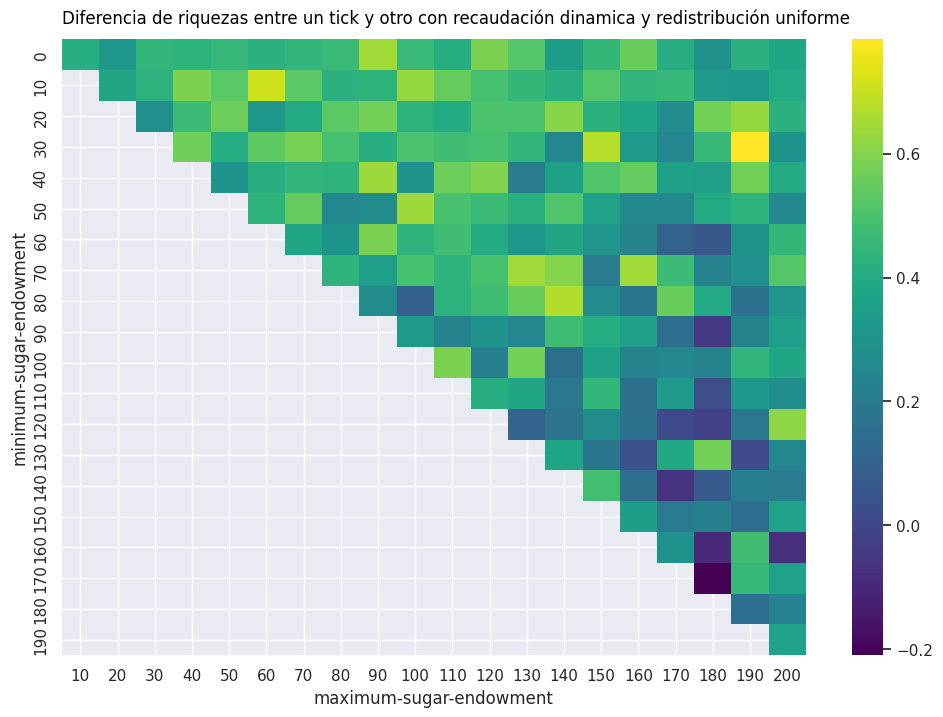

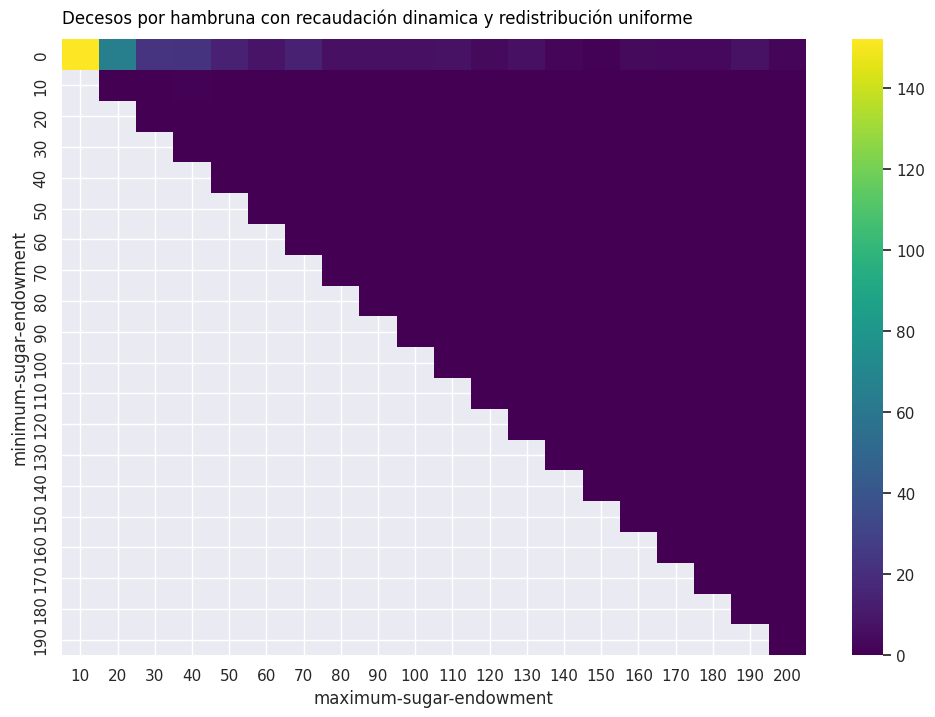

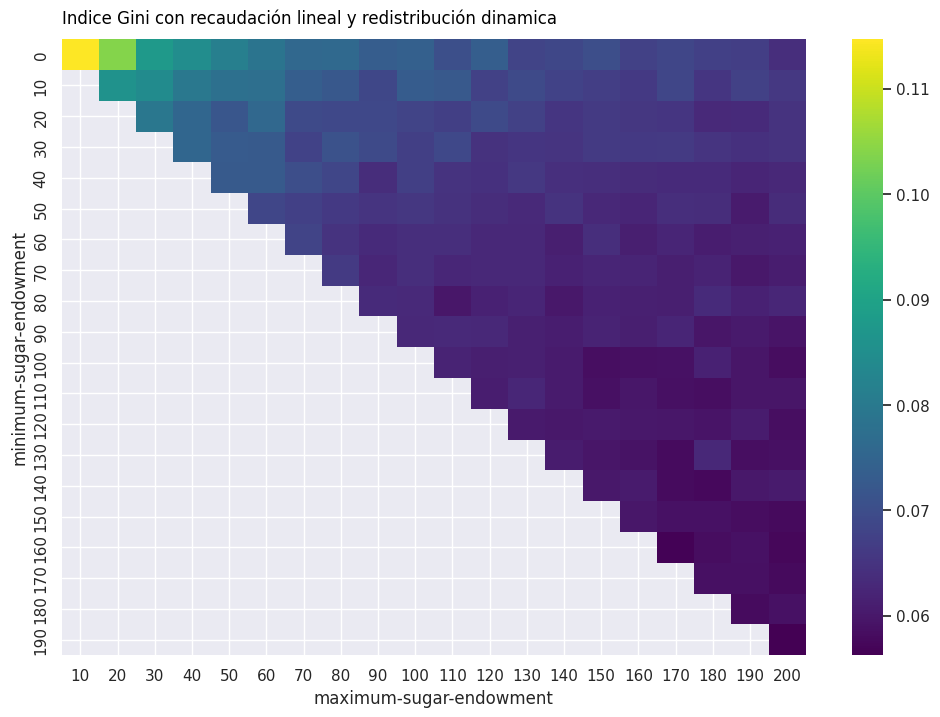

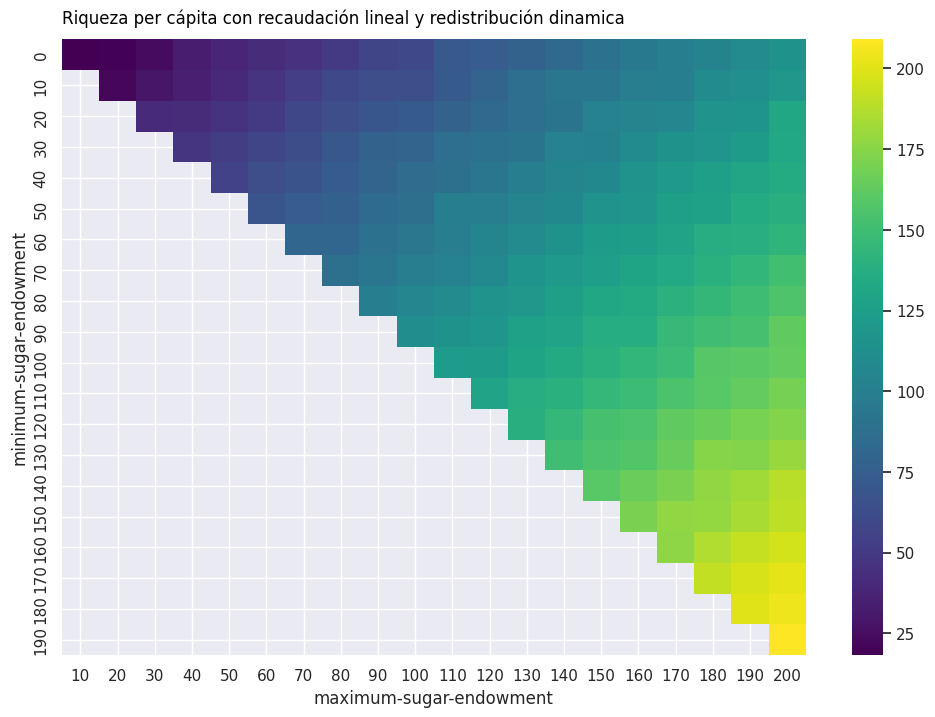

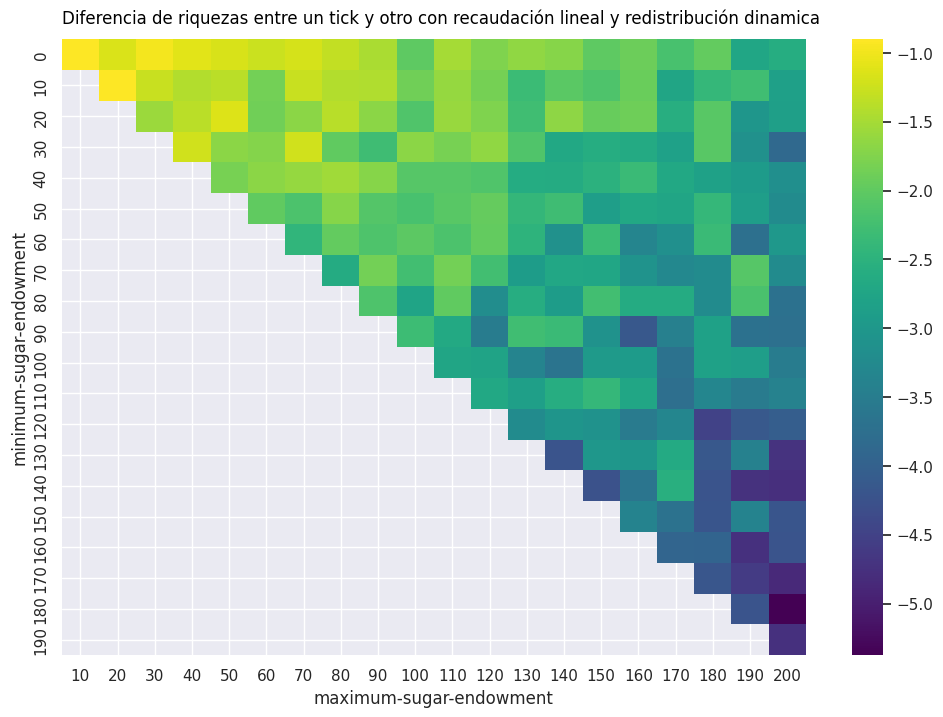

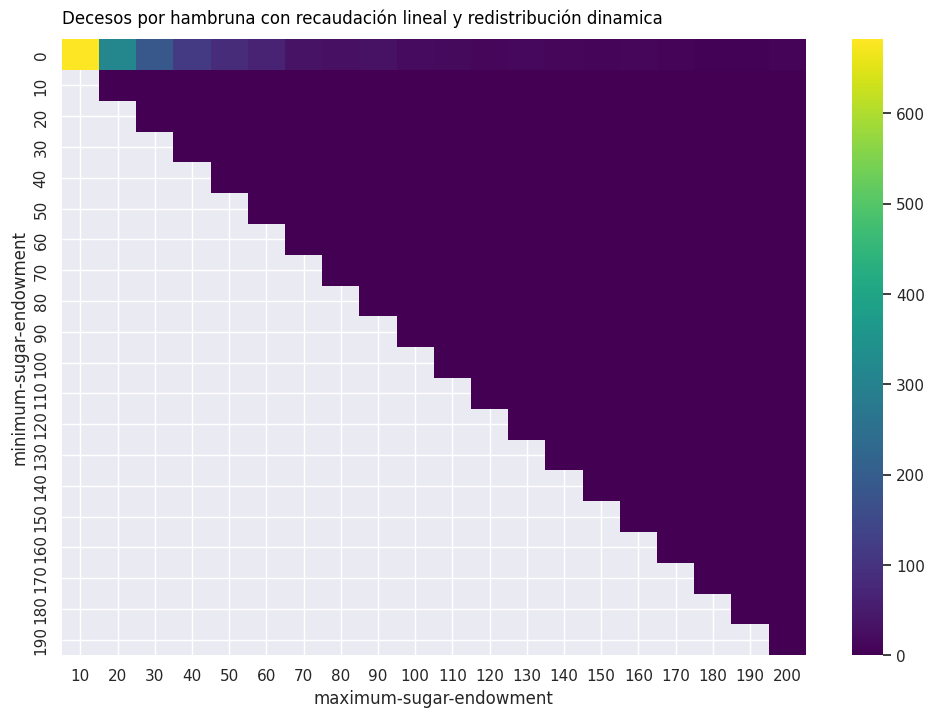

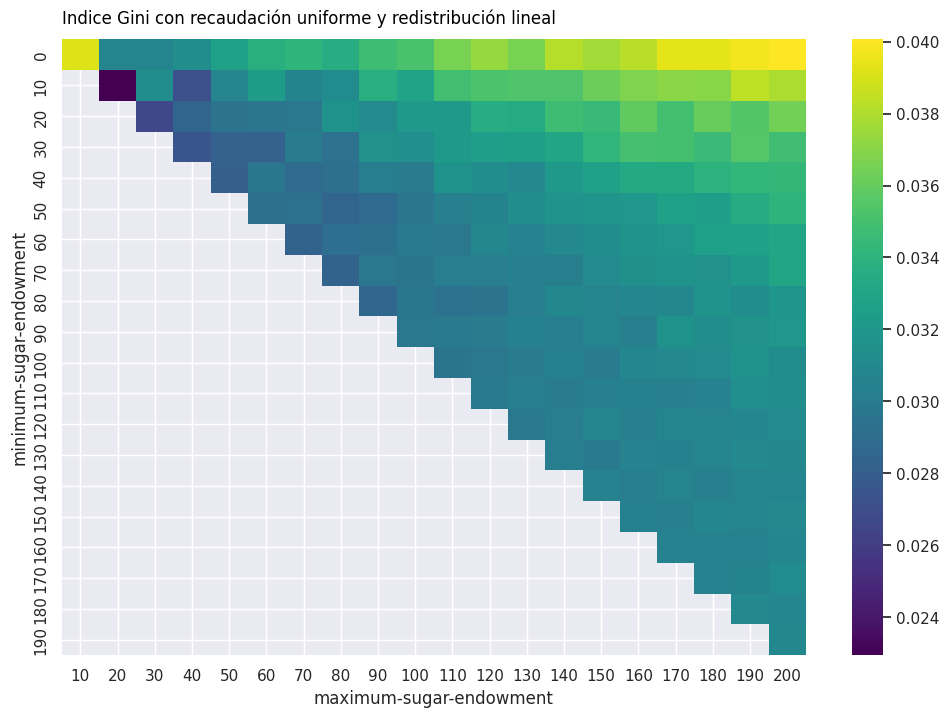

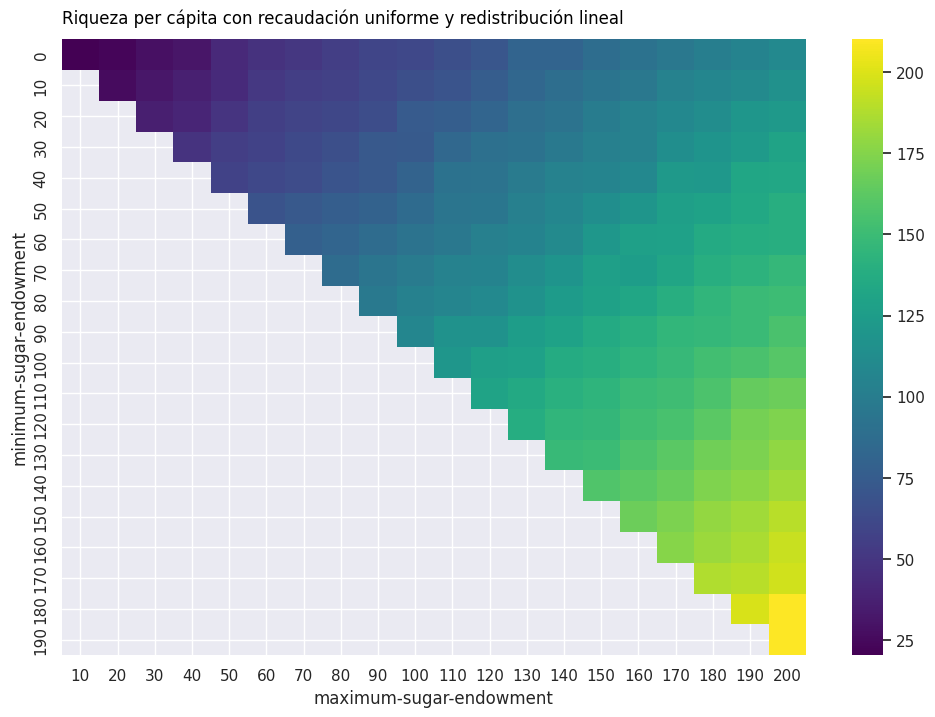

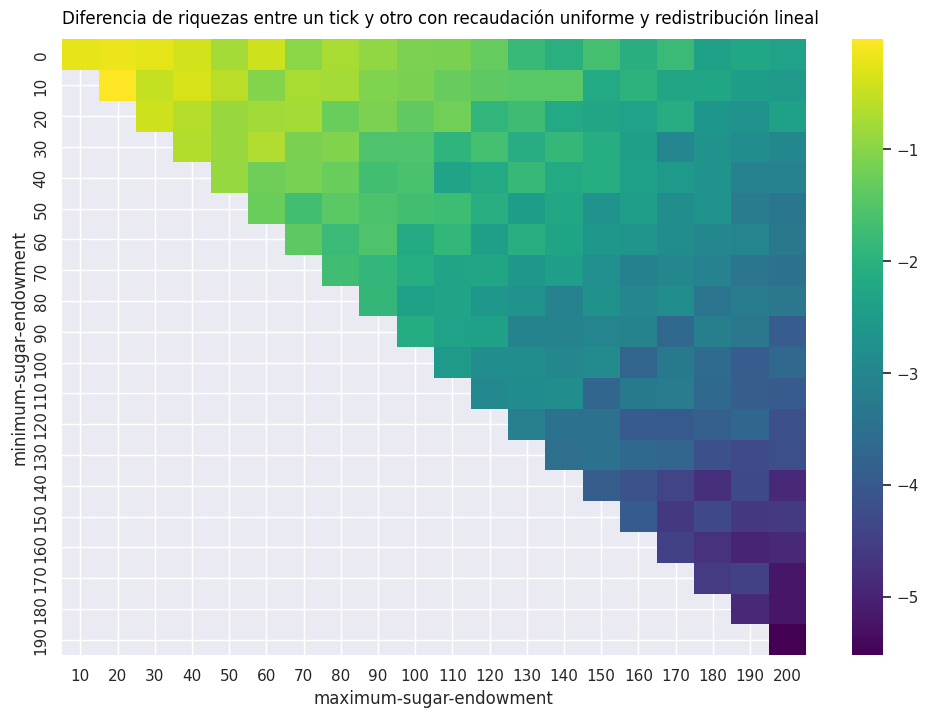

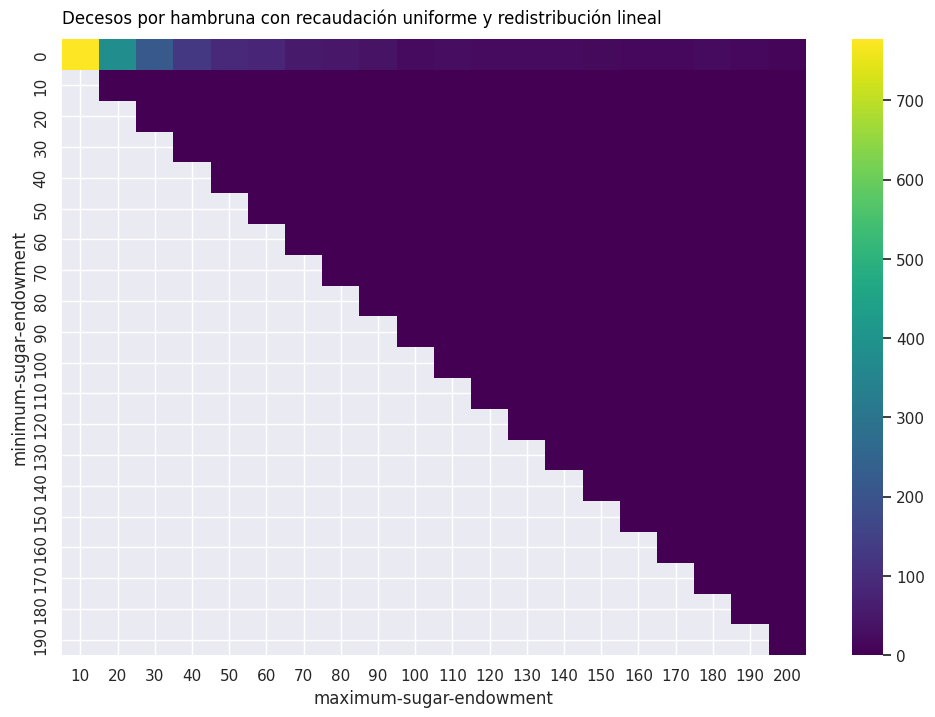

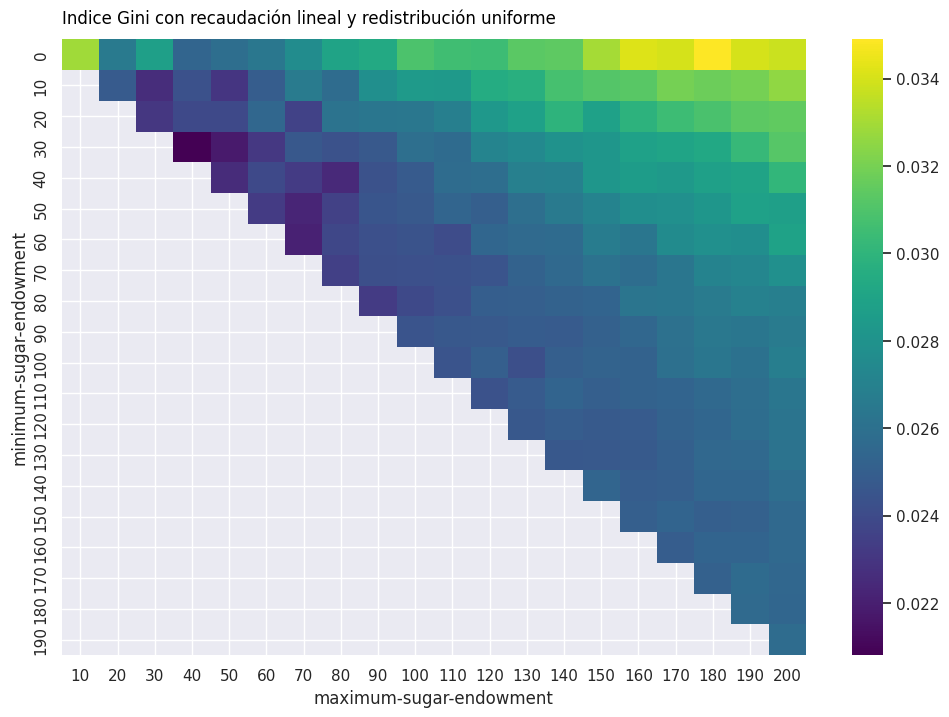

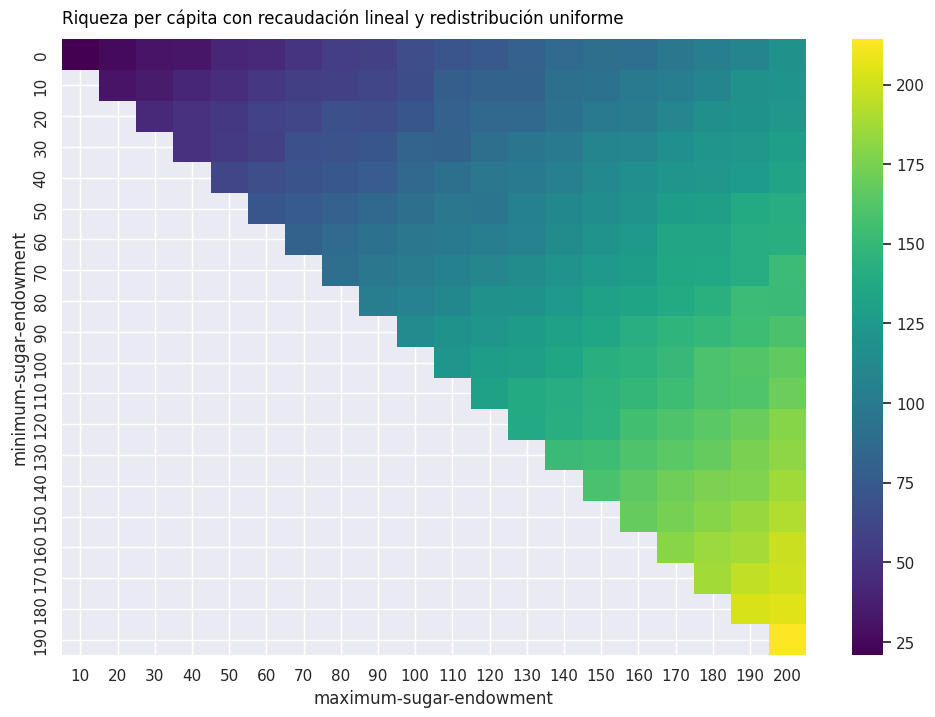

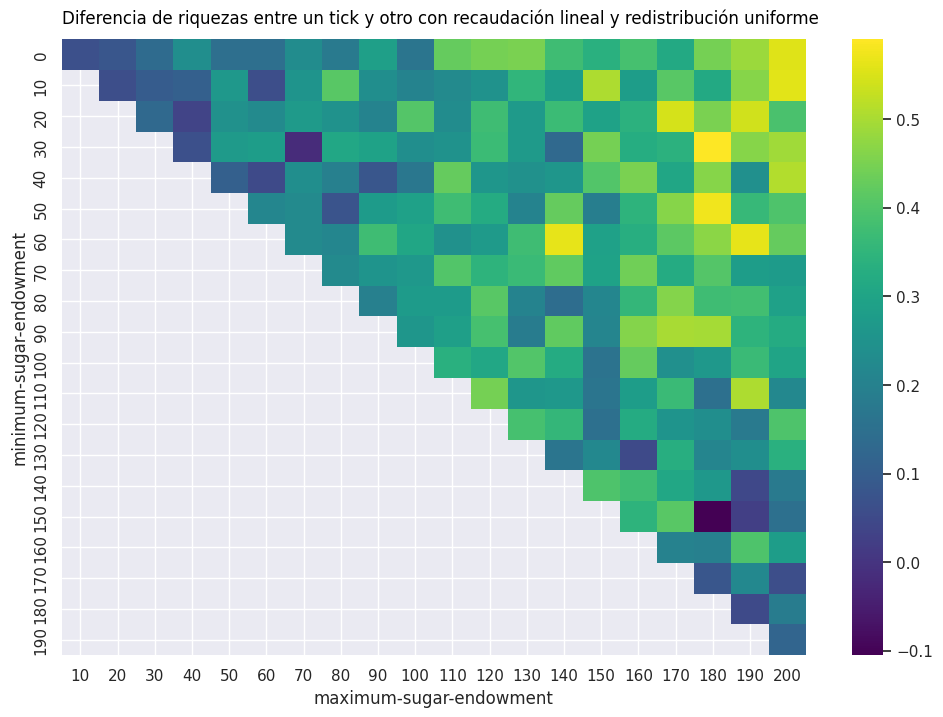

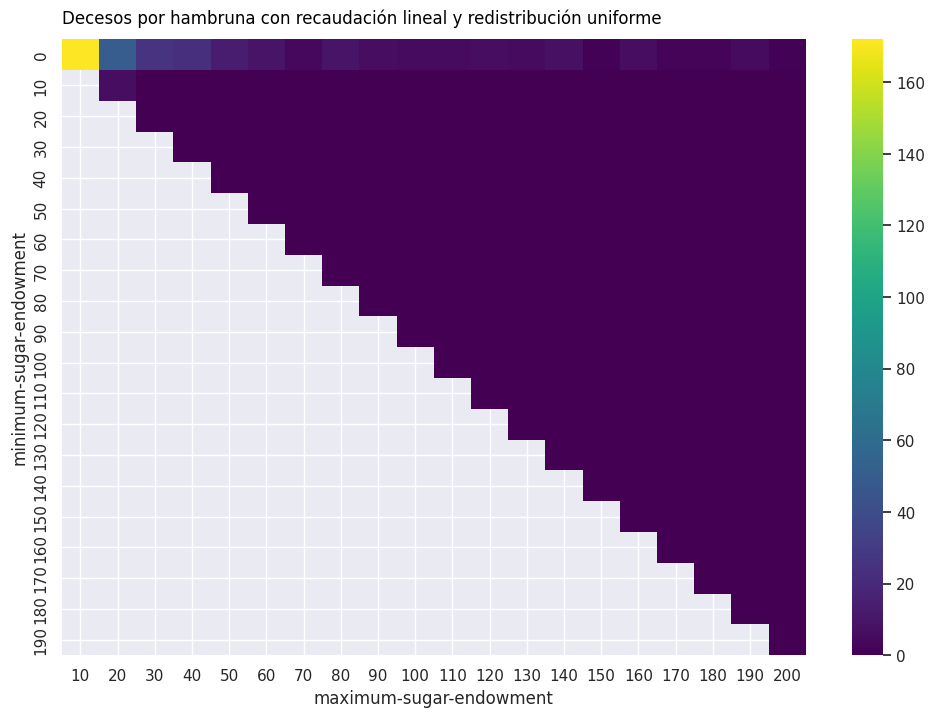

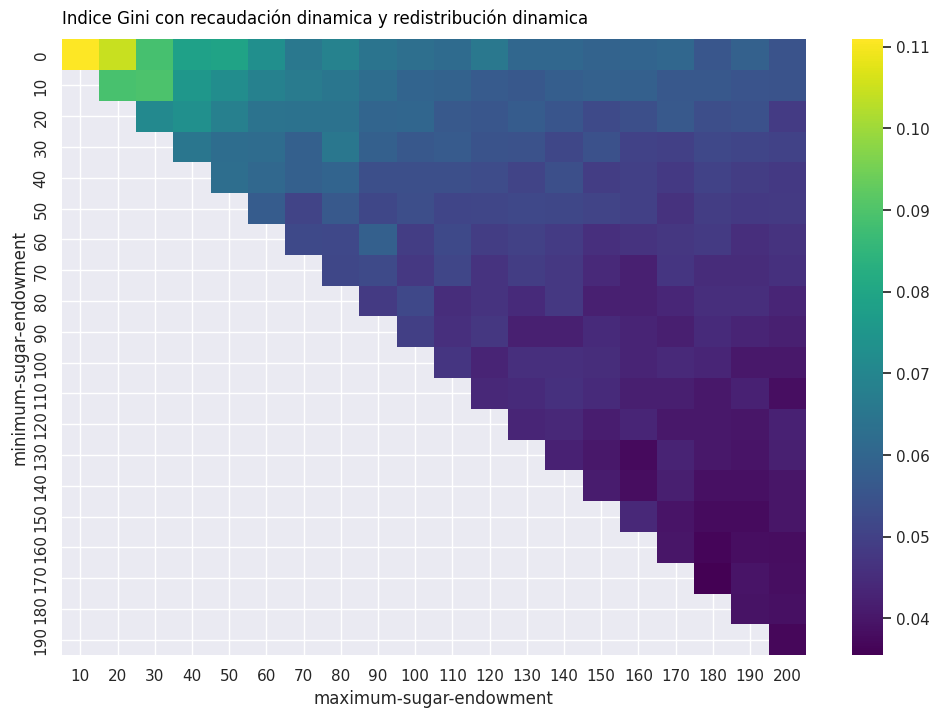

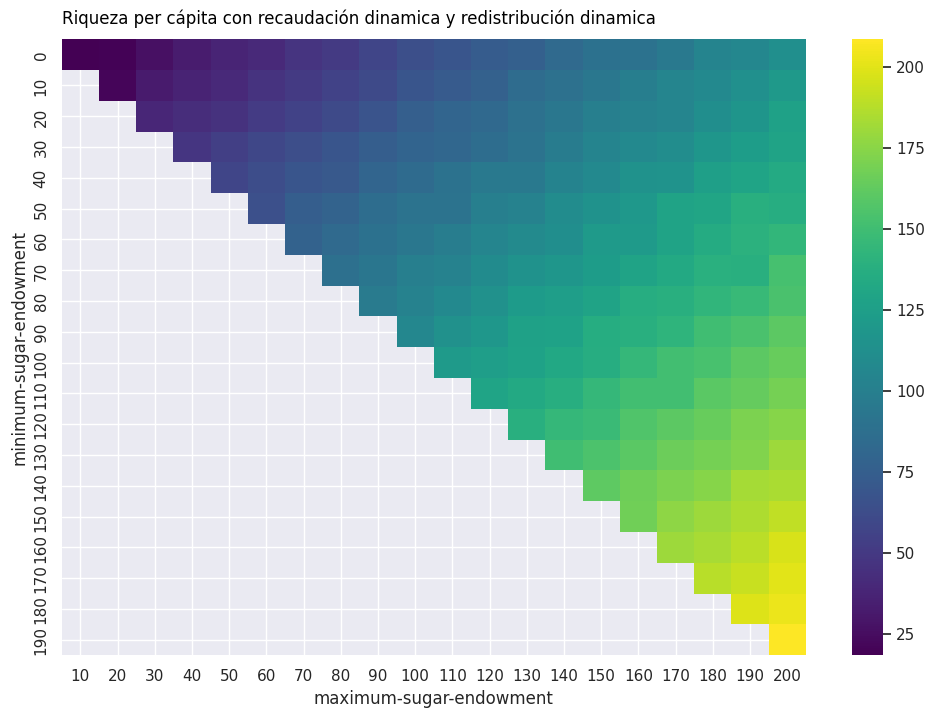

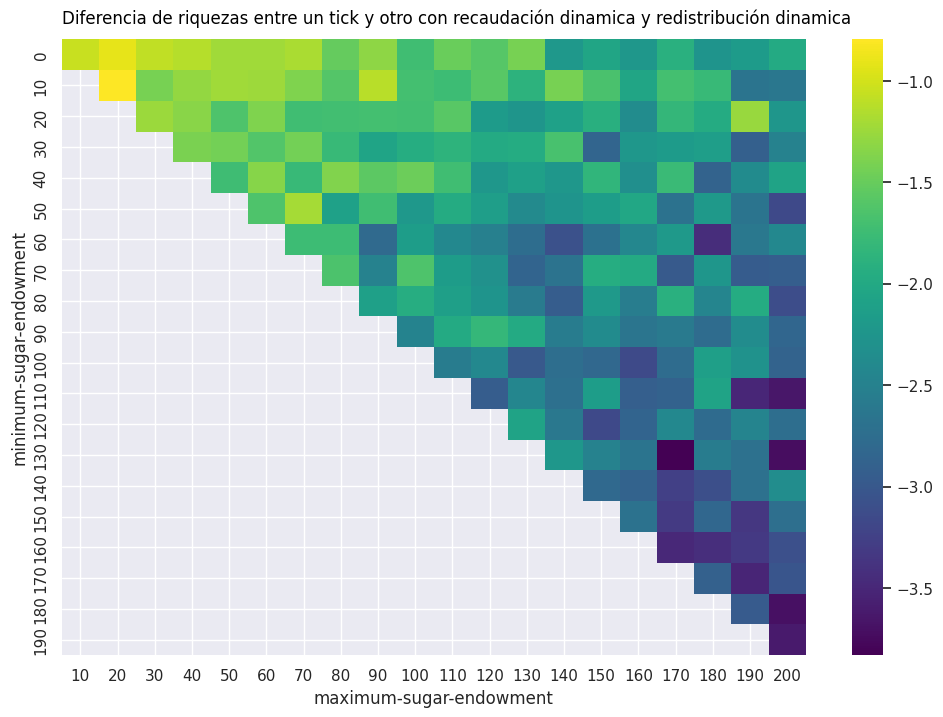

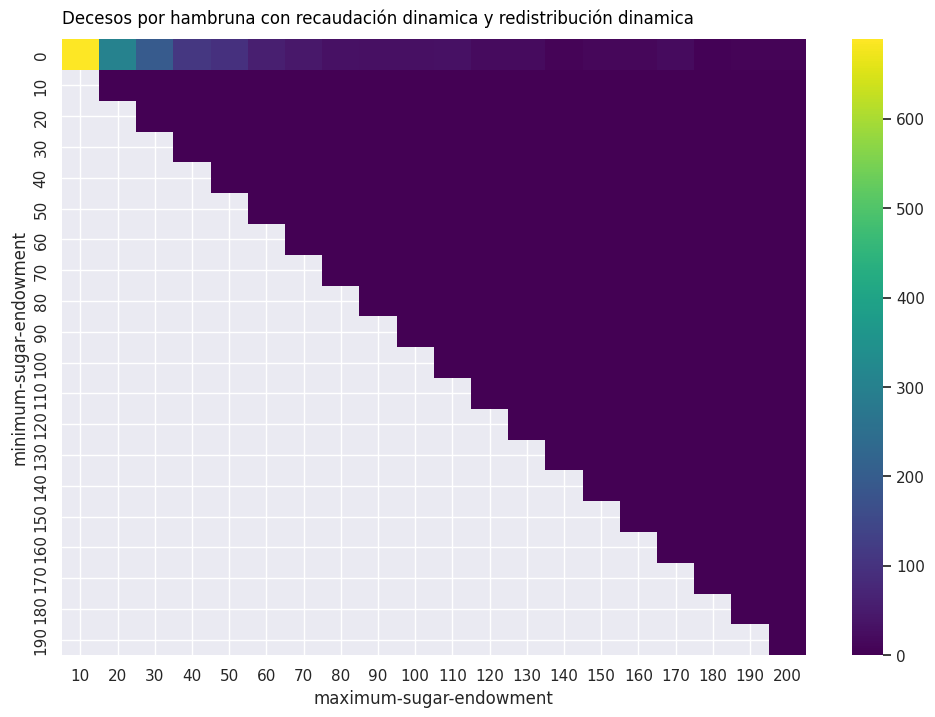

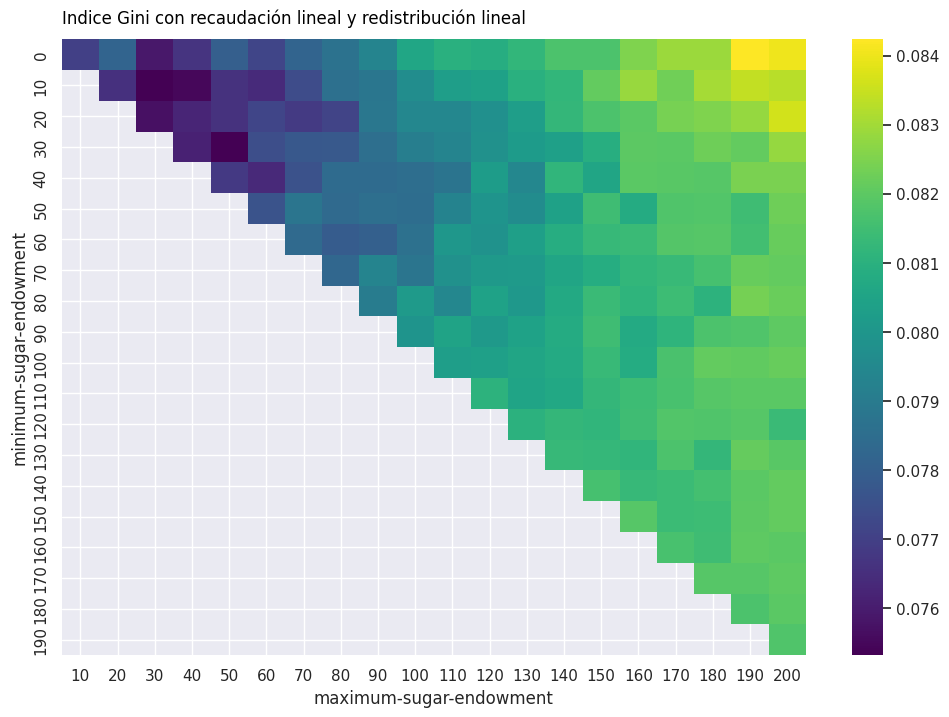

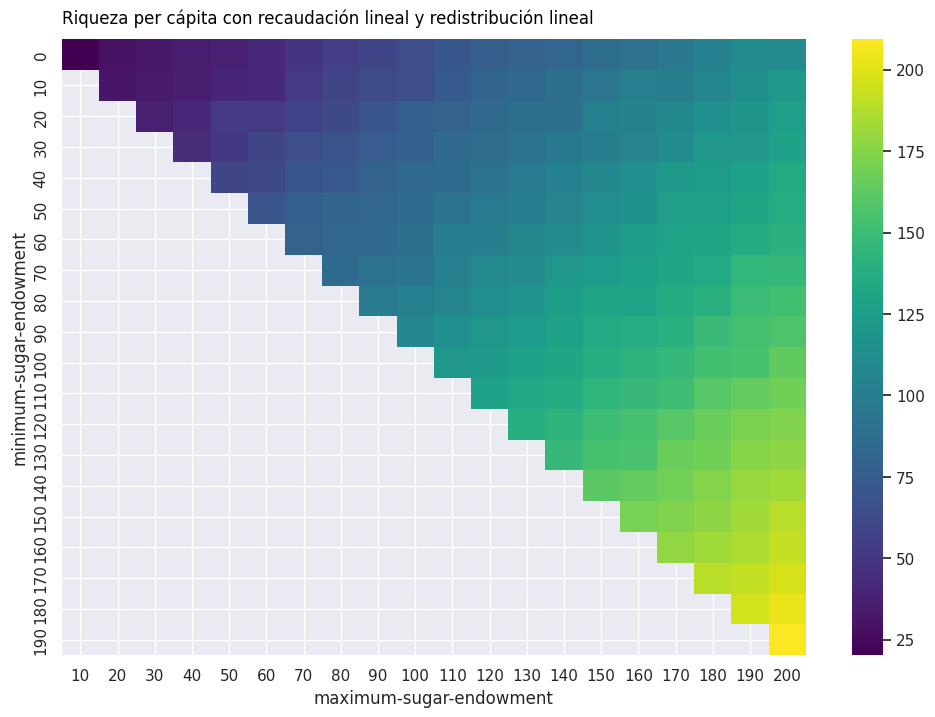

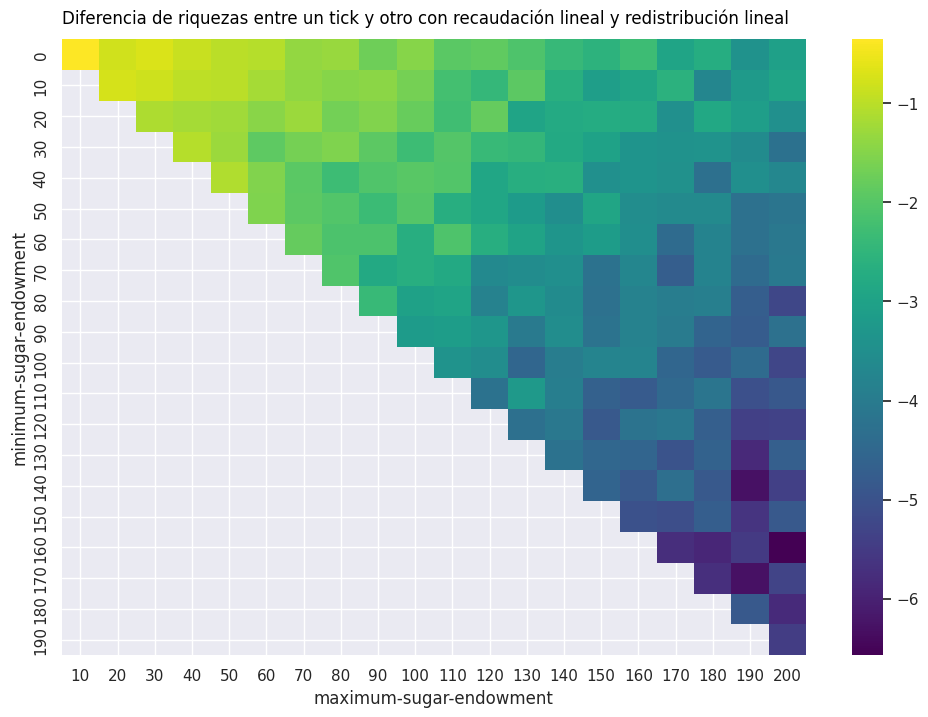

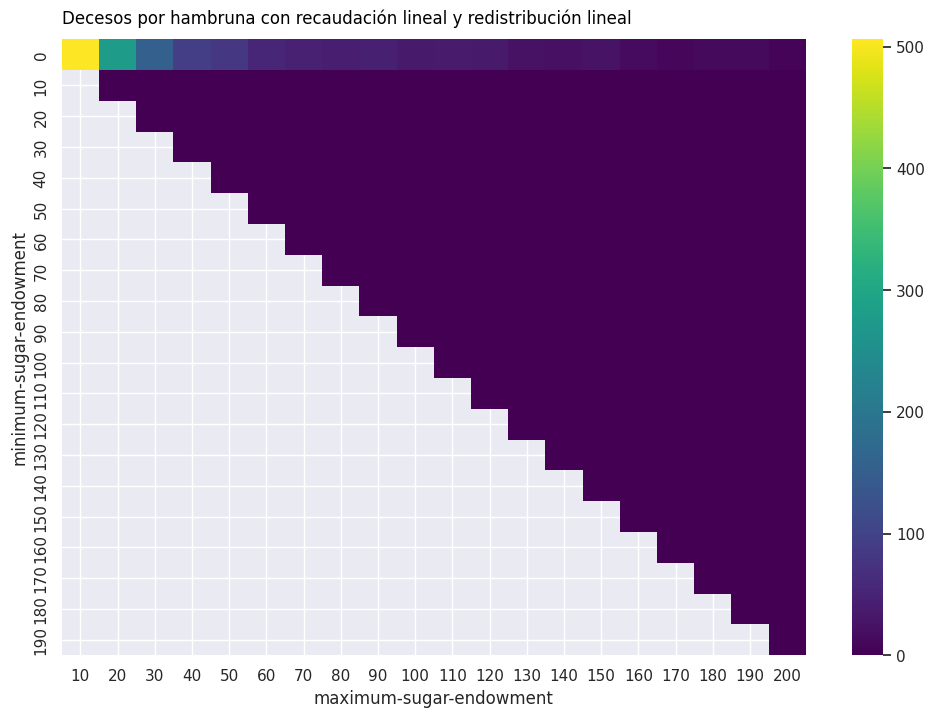

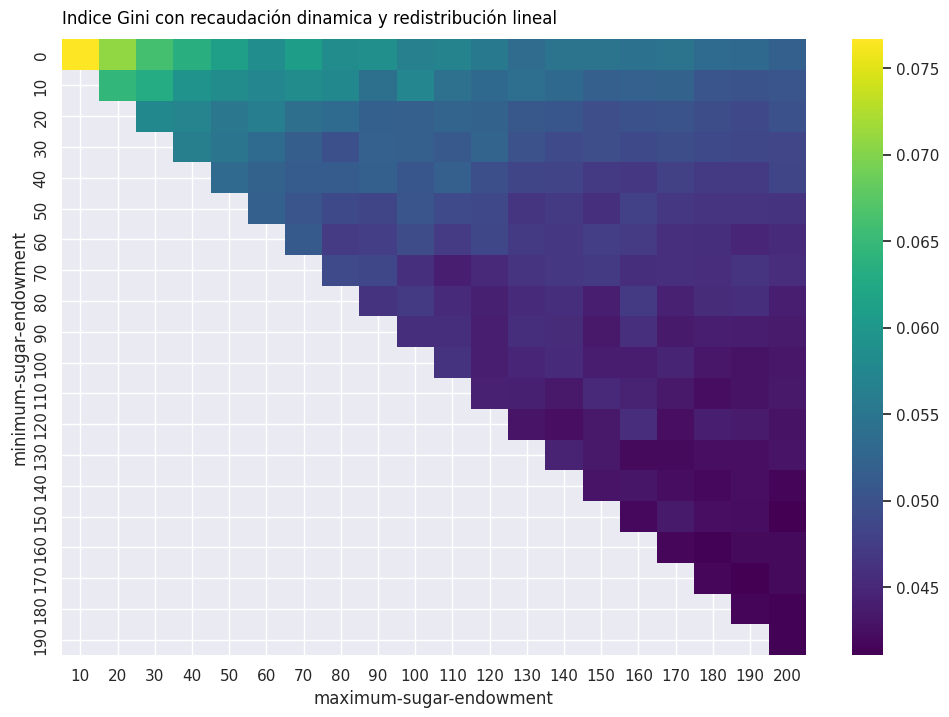

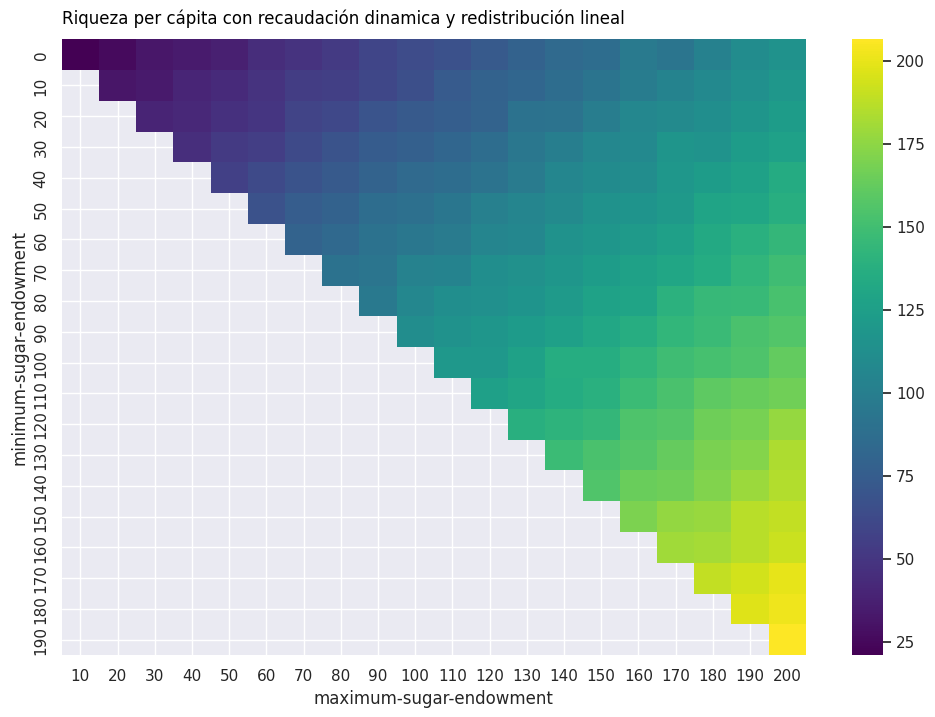

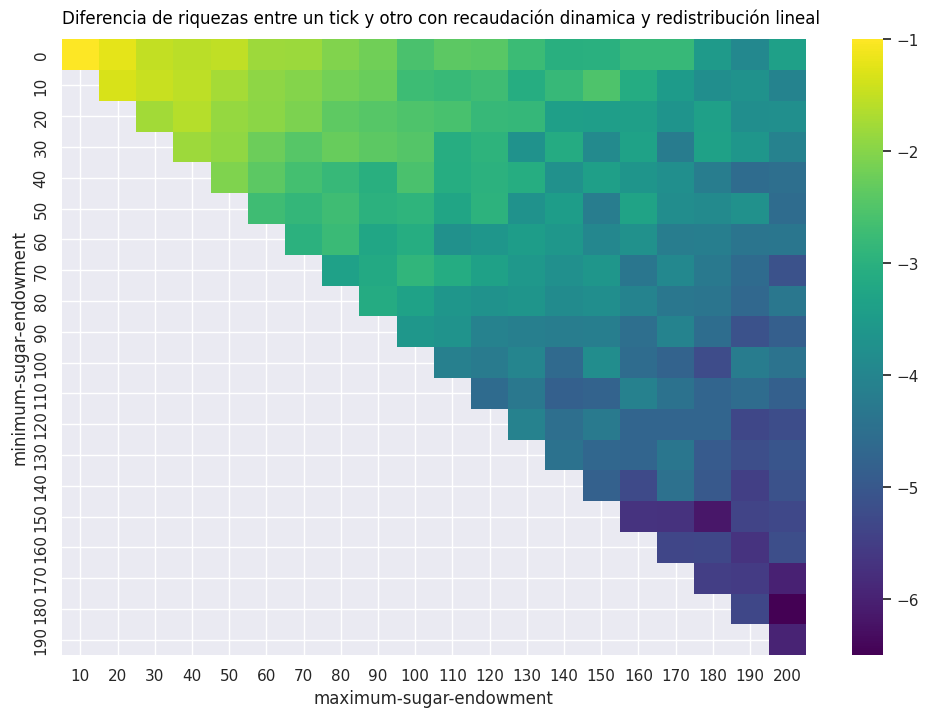

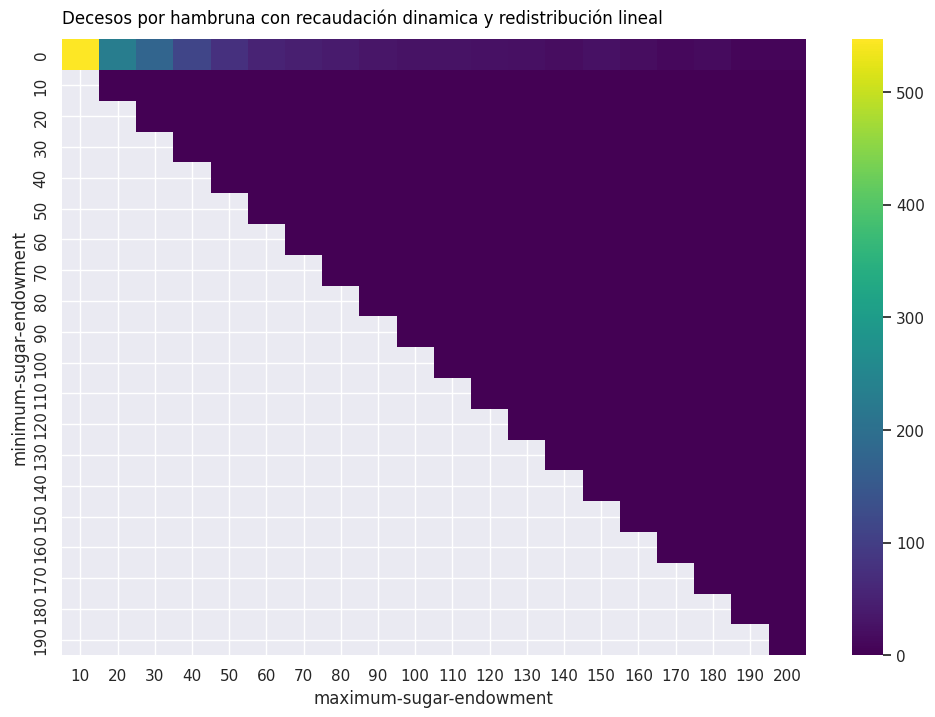

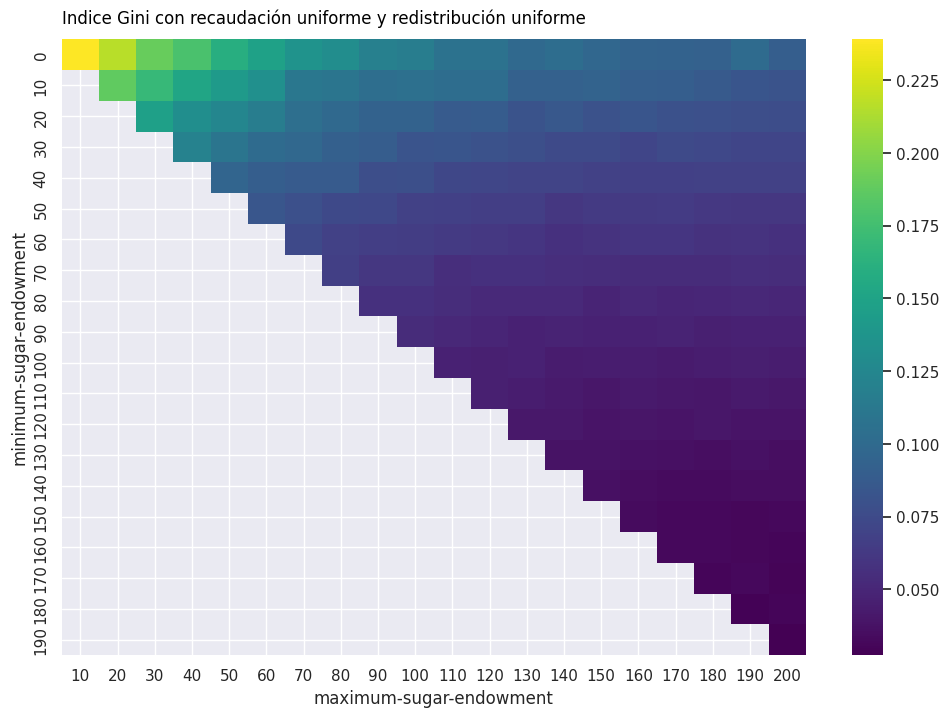

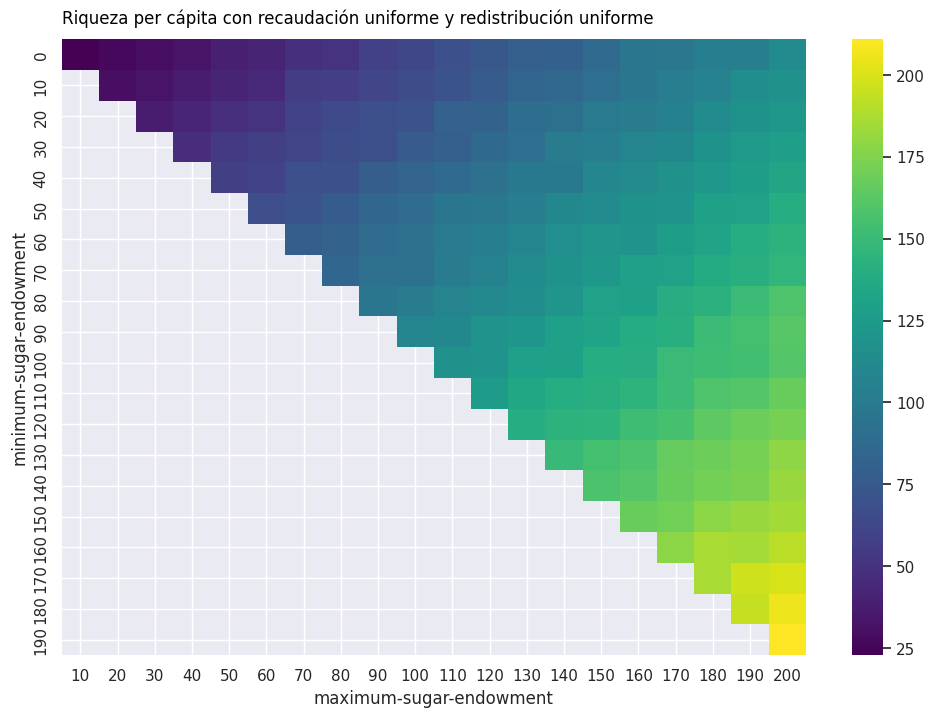

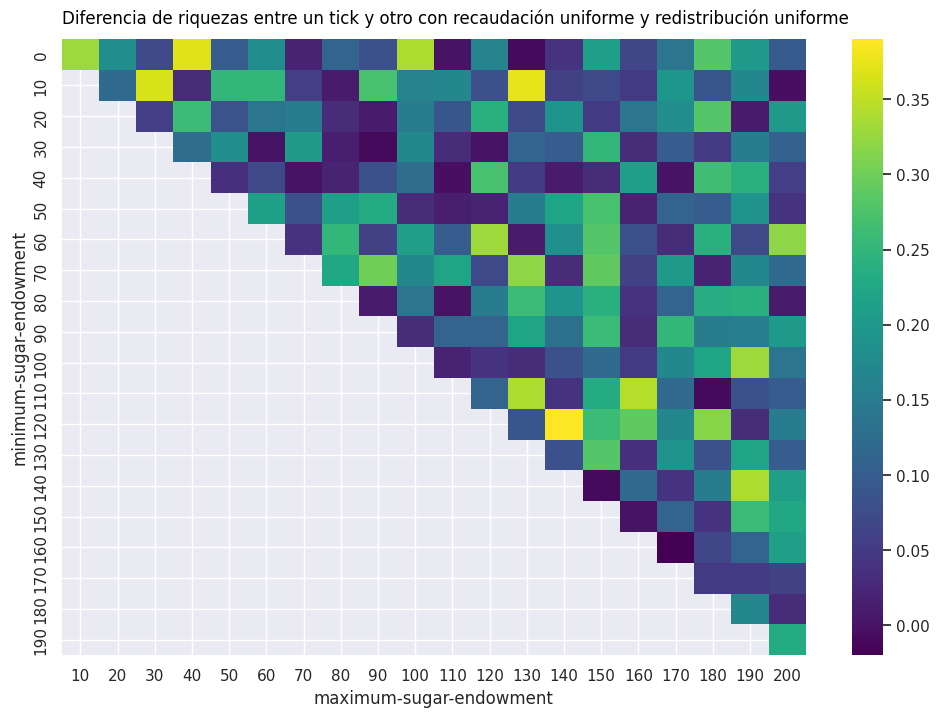

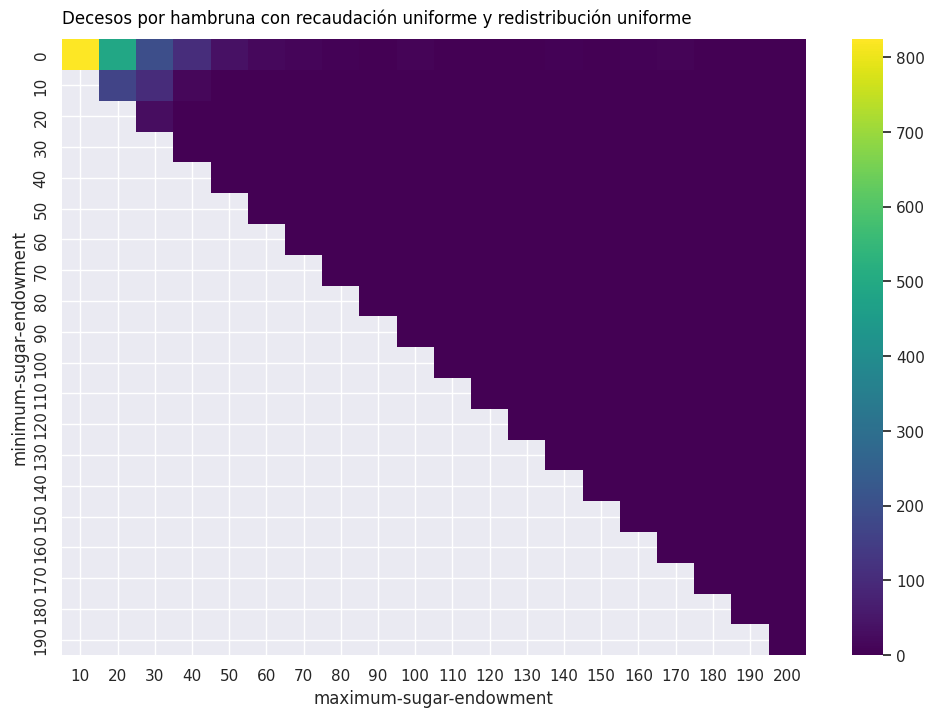

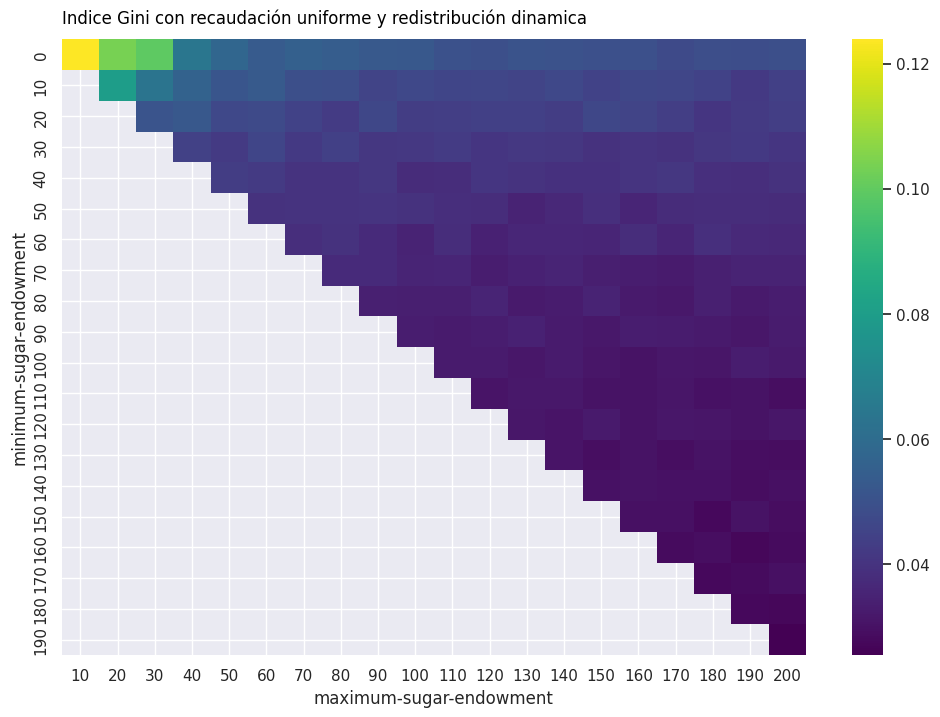

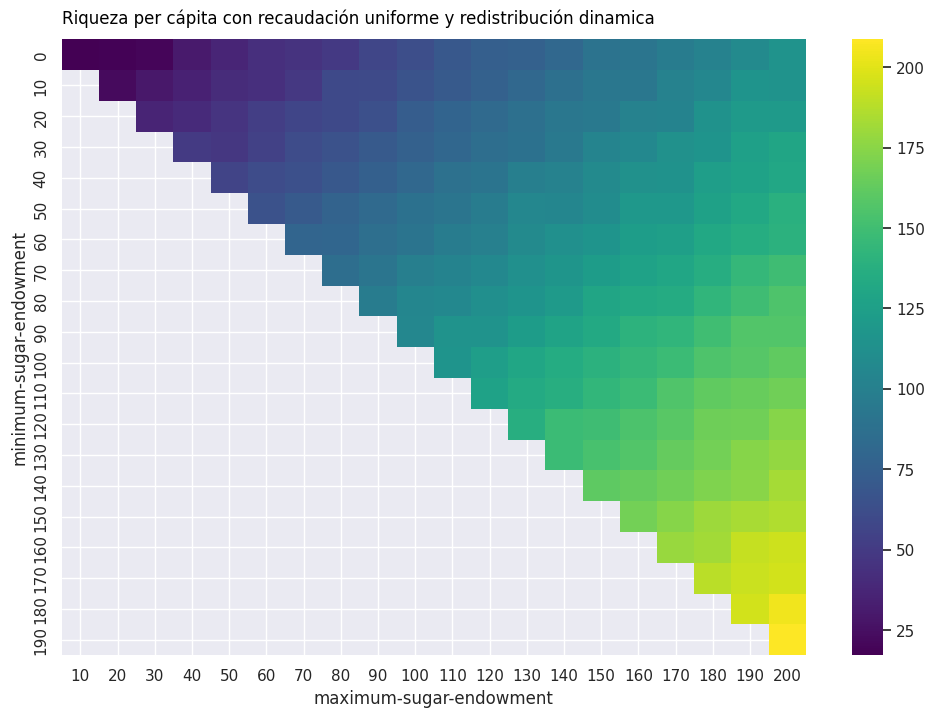

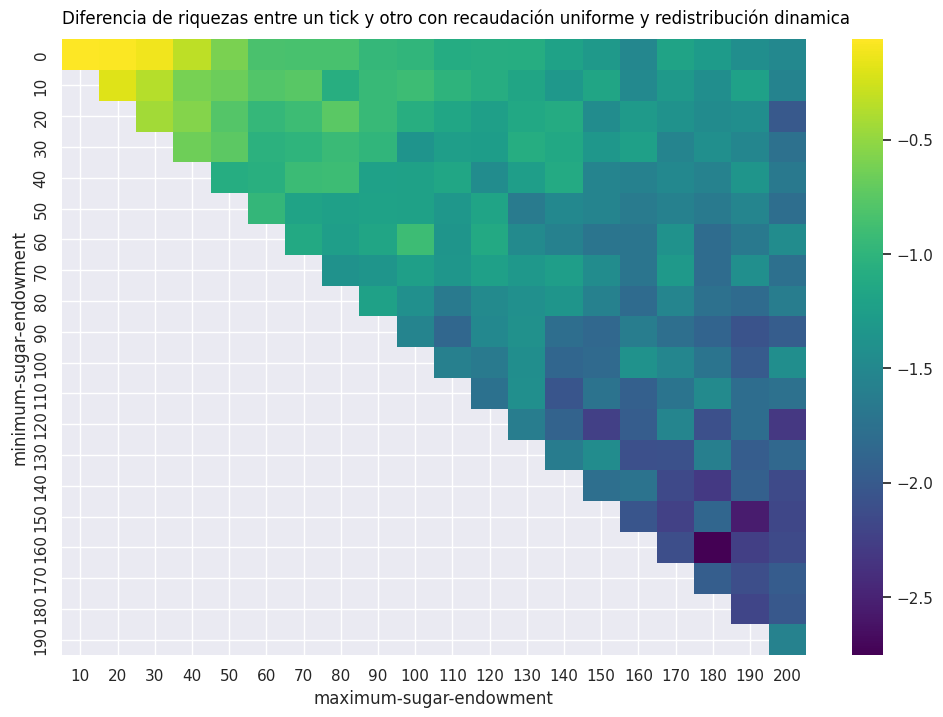

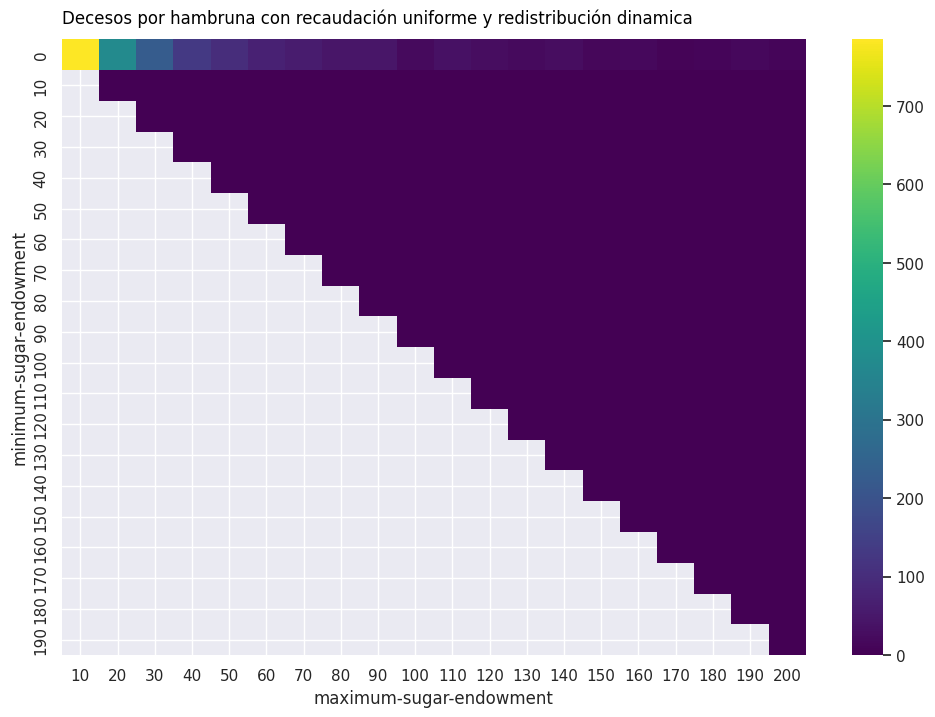

In [29]:

# Las caracteristicas a analizar en cada mapa de calor
tipos_analisis = {'Indice Gini':'avg-gini',
                  'Riqueza per cápita':'avg-productivity',
                  'Diferencia de riquezas entre un tick y otro':'avg-diff',
                  'Decesos por hambruna' : 'starvation'
                 }
# patron util para recuperar el tipo de politica de recaudacion y redistribucion
patron = r"(\w+)-(\w+)\.csv$"
carpeta_datasets = Path('datasets/')
for archivo in carpeta_datasets.glob("*.csv"):
    match = re.match(patron, archivo.name)
    df = pd.read_csv(archivo)
    df = limpiar_dataframe(df)
    print(archivo.name)
    if match:
        recaudacion = match.group(1)
        redist = match.group(2)
        for llave in tipos_analisis.keys():
            ruta_imagen = 'figuras/' + llave + ' ' + recaudacion + ' ' + redist + '.png'
            titulo_mapa = llave + ' con recaudación ' + recaudacion + ' y redistribución ' + redist
            medida = tipos_analisis[llave]
            mapa_calor(df,medida,titulo_mapa,ruta_imagen)

        
